# E-commerce 행동 데이터 분석


## 1. 분석 목적 정의
E-commerce 데이터를 분석하여 마케팅, 영업 의사 결정에 활용한다.</br>
소비자들을 RFM 기반으로 분석하여 용이한 의사 결정을 보조한다.

### 분석 프로세스
1. 분석 목표 정의
2. 데이터 전처리
3. EDA
4. ML 분석

### 활용 분석 모델
1. Clustering Algorithm
2. RFM scoring Model, RFM model with K-means

---
## RFM 분석이란?
### CRM에서 많이 활용하는 고객 가치 분석 방법론
- Recency: 최근 구매, 최근 행동
- Frequency: 방문 빈도, 행동 빈도
- Monetary: 소비 행동, 얼마나 쓰는가?

#### 자주 구매하며, 최근에도 구매하며, 많이 소비하는 고객을 VIP 고객을 분류하고, 마케팅 전략을 수립하는데 도움이 될 수 있다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

# library for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

## 2. Data Processing 1

### 2.1. Data Load

In [5]:
!pwd
path = "/content/drive/MyDrive/Data Analysis Projects/E-commerce 행동 데이터 분석"
random_state = 1234

/content


In [6]:
df = pd.read_csv(path + "/Data/data.csv", encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2.2. 중복 Data 확인

In [7]:
print("중복된 항목 수 :", len(df[df.duplicated()]))

중복된 항목 수 : 5268


In [8]:
df = df.drop_duplicates().reset_index(drop = True)

## 3. Data EDA

### 3.1. Data Type and Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [10]:
# categorical and numerical columns
for column_name in list(df.columns):

    print(column_name,df[column_name].dtype, df[column_name].unique())

InvoiceNo object ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode object ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description object ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity int64 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
 

In [11]:
# Customer ID는 카테고리 데이터로 변경
list_cast_to_object = ["CustomerID"]
for column_name in list_cast_to_object:
    df[column_name] = df[column_name].astype(object)

In [12]:
# 카테고리, 수량 데이터 비교
list_categorical_columns = list(df.select_dtypes(include = ['object']).columns)
list_numerical_columns = list(df.select_dtypes(include = ['float64', 'int64']).columns)
print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numerical_columns))

536641
8
6
2


In [13]:
list_categorical_columns

['InvoiceNo',
 'StockCode',
 'Description',
 'InvoiceDate',
 'CustomerID',
 'Country']

In [14]:
list_numerical_columns

['Quantity', 'UnitPrice']

In [15]:
# 결측값 확인
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

---
데이터 요약

- 변수 8개
-- 차원 6개, 측정값 2개
- 행 536,641개
- 결측값 포함된 필드 2개
- 중복값 5,268개(제거함)

### 3.2. 독립변수 데이터 EDA

#### 3.2.1. 차원 데이터

In [16]:
# 불필요한 컬럼 확인
df[list_categorical_columns].nunique().sort_values()
# 이 값만으로는 확인이 어려움

Country           38
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

In [17]:
# 고객 분석에서 Description은 활용 안 할 예정
df = df.drop(["Description"], axis = 1)
list_categorical_columns.remove("Description")

In [18]:
list_categorical_columns

['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Country']

<Axes: xlabel='StockCode', ylabel='Count'>

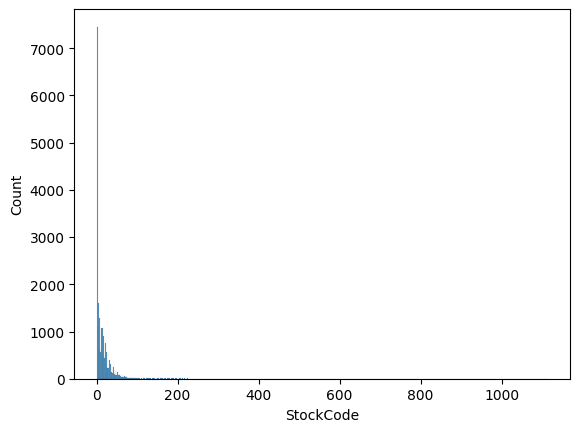

In [19]:
# 필드별 분포 확인
# 1. 인보이스 번호별로 몇 개의 상품을 구매하는가?
df_invoiceno_count = df.groupby("InvoiceNo").count()["StockCode"]
sns.histplot(df_invoiceno_count)

<Axes: ylabel='StockCode'>

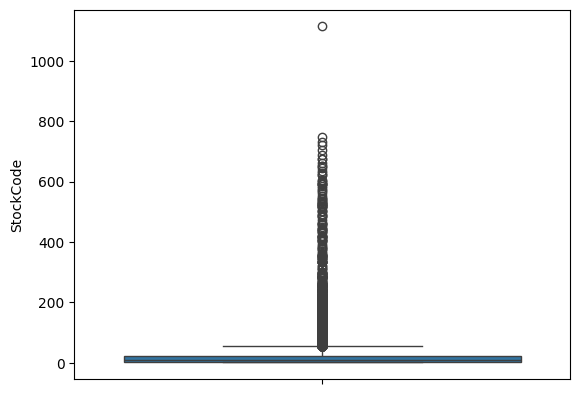

In [20]:
sns.boxplot(df_invoiceno_count)

In [21]:
df_invoiceno_count.describe()
# max 값 확인 필요

count    25900.000000
mean        20.719730
std         42.793088
min          1.000000
25%          2.000000
50%         10.000000
75%         23.000000
max       1114.000000
Name: StockCode, dtype: float64

In [22]:
no_invoice_max = df_invoiceno_count[df_invoiceno_count == max(df_invoiceno_count)]
print(no_invoice_max.index[0])
df[df.InvoiceNo == no_invoice_max.index[0]]

# 해당 count(1114, max)를 갖는 invoice의 Customer ID는 NaN임. 처리할 필요 있음

573585


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
426616,573585,11001,2,10/31/2011 14:41,3.29,NaN,United Kingdom
426617,573585,15036,15,10/31/2011 14:41,1.63,NaN,United Kingdom
426618,573585,15039,15,10/31/2011 14:41,1.63,NaN,United Kingdom
426619,573585,15056BL,1,10/31/2011 14:41,12.46,NaN,United Kingdom
426620,573585,15056N,1,10/31/2011 14:41,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...
427725,573585,90209C,3,10/31/2011 14:41,2.07,NaN,United Kingdom
427726,573585,90214S,1,10/31/2011 14:41,0.83,NaN,United Kingdom
427727,573585,DOT,1,10/31/2011 14:41,2019.05,NaN,United Kingdom
427728,573585,gift_0001_20,1,10/31/2011 14:41,16.67,NaN,United Kingdom


In [23]:
df = df.dropna().reset_index(drop = True)

<Axes: xlabel='StockCode', ylabel='Count'>

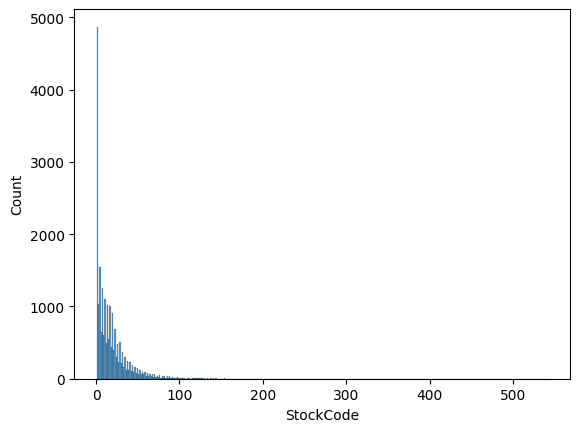

In [24]:
# 이상치 제거 후 다시 확인
df_invoiceno_count = df.groupby("InvoiceNo").count()["StockCode"]
sns.histplot(df_invoiceno_count)

<Axes: ylabel='StockCode'>

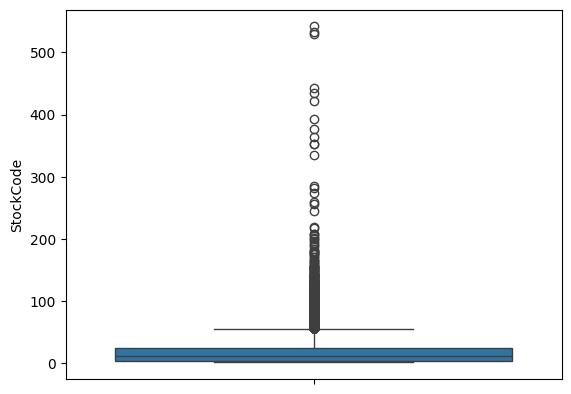

In [25]:
sns.boxplot(df_invoiceno_count)

In [26]:
df_invoiceno_count.describe()

count    22190.000000
mean        18.098423
std         23.363888
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        542.000000
Name: StockCode, dtype: float64

In [27]:
# max 값 다시 확인
no_invoice_max = df_invoiceno_count[df_invoiceno_count == max(df_invoiceno_count)]
print(no_invoice_max.index[0])
df[df.InvoiceNo == no_invoice_max.index[0]]

576339


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
347900,576339,10135,14,11/14/2011 15:27,2.46,14096.0,United Kingdom
347901,576339,15044A,1,11/14/2011 15:27,5.79,14096.0,United Kingdom
347902,576339,16238,2,11/14/2011 15:27,0.42,14096.0,United Kingdom
347903,576339,16258A,1,11/14/2011 15:27,0.83,14096.0,United Kingdom
347904,576339,17003,2,11/14/2011 15:27,0.63,14096.0,United Kingdom
...,...,...,...,...,...,...,...
348437,576339,90083,1,11/14/2011 15:27,1.63,14096.0,United Kingdom
348438,576339,90086,1,11/14/2011 15:27,1.63,14096.0,United Kingdom
348439,576339,90119,11,11/14/2011 15:27,2.46,14096.0,United Kingdom
348440,576339,90166,1,11/14/2011 15:27,4.15,14096.0,United Kingdom


In [28]:
# 2. 상품별 구매 수?
df.StockCode.nunique()

3684

In [29]:
no_stockcode_buy = df.groupby("StockCode").count()["InvoiceNo"]

In [30]:
no_stockcode_buy.sort_values(ascending = False)

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90176B       1
90176C       1
90069        1
90035C       1
37461        1
Name: InvoiceNo, Length: 3684, dtype: int64

In [31]:
no_stockcode_buy.describe()

count    3684.000000
mean      109.013029
std       165.656870
min         1.000000
25%        12.000000
50%        48.000000
75%       137.000000
max      2065.000000
Name: InvoiceNo, dtype: float64

In [32]:
# 3. 요일별 상품 구매 수 차이?
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate)

In [33]:
df_tmp = df

In [34]:
df_tmp["weekday"] = df.InvoiceDate.dt.weekday
df_tmp["month"] = df.InvoiceDate.dt.month
df_tmp["hour"] = df.InvoiceDate.dt.hour

In [35]:
df_tmp.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,12,8
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,12,8
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8


<Axes: xlabel='weekday'>

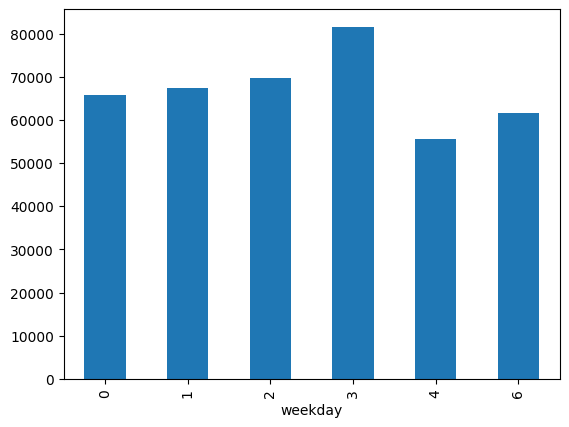

In [36]:
df_tmp.groupby("weekday").count()["Quantity"].plot.bar()
# 금요일 데이터 없는 것 확인 -> 누락 가능성 있음

<Axes: xlabel='month'>

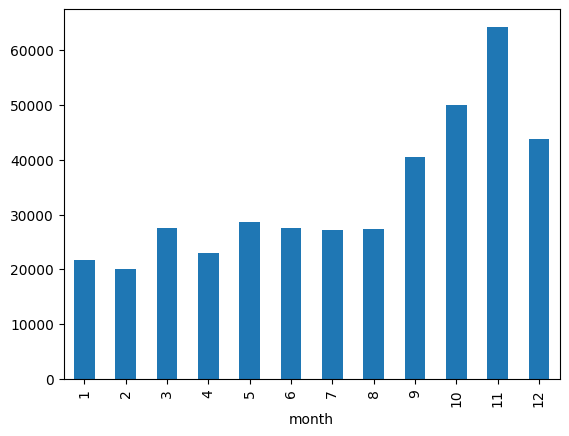

In [37]:
df_tmp.groupby("month").count()["Quantity"].plot.bar()

<Axes: xlabel='hour'>

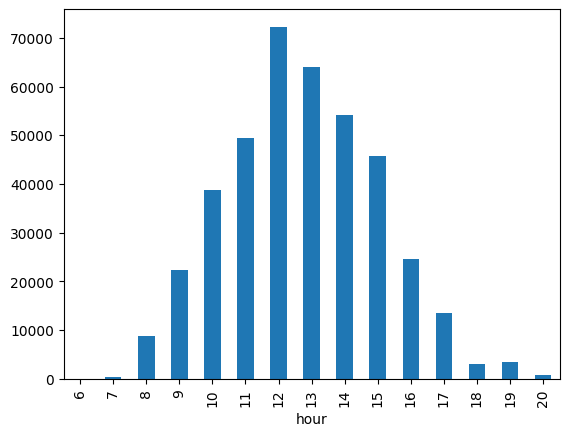

In [38]:
df_tmp.groupby("hour").count()["Quantity"].plot.bar()

In [39]:
# 4. 국가별 상품 구매 차이?
df.Country.nunique()

37

<Axes: xlabel='Country'>

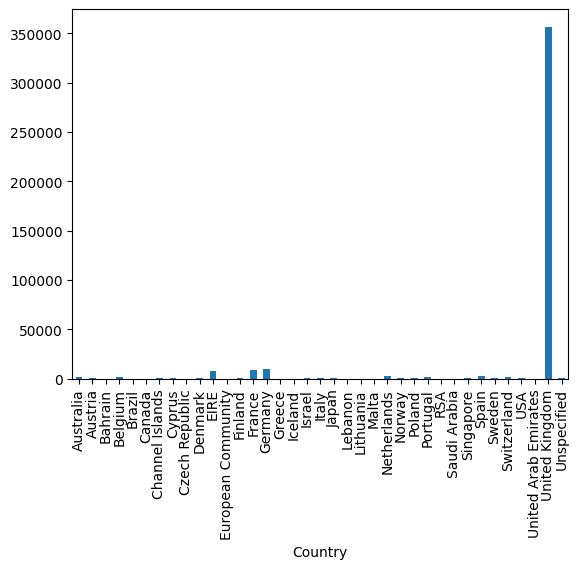

In [40]:
df.groupby("Country").count()["Quantity"].plot.bar()

---
인사이트
1. 한 구매에 다양한 상품을 구매한다.
2. 일부 잘 팔리는 제품이 있다.
3. 평일에 더 많은 상품을 구매한다. 목요일 판매가 가장 높다. 다만, 금요일 데이터가 없다.
4. 정오에 가장 많은 상품을 구매한다.
5. 겨울, 특히, 11월에 많이 구매한다.
6. 영국 구매 데이터가 가장 많다.

#### 3.2.2. 측정값 데이터

In [41]:
df[list_numerical_columns].nunique().sort_values()

Quantity     436
UnitPrice    620
dtype: int64

In [42]:
df[list_numerical_columns].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [43]:
# 필드별 분포 확인
df[df.Quantity < 0]
# 환불 데이터?

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2,12,9
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2,12,9
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2,12,10
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,12,10
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,12,10
...,...,...,...,...,...,...,...,...,...,...
401159,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,4,12,9
401243,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,4,12,10
401410,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,4,12,11
401411,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,4,12,11


In [44]:
# 환불하지 않은 데이터만 활용
df = df[df.Quantity > 0]

In [45]:
df[list_numerical_columns].describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


<Axes: ylabel='Quantity'>

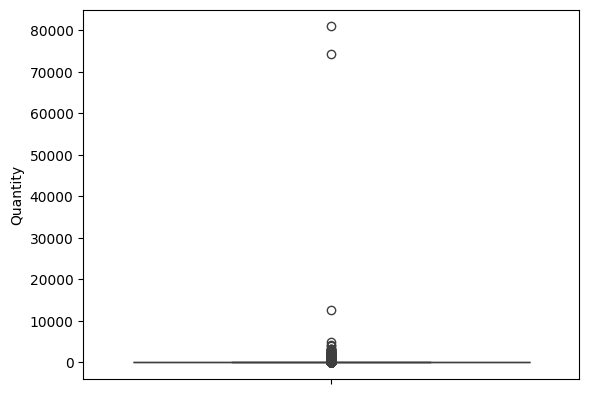

In [46]:
sns.boxplot(df["Quantity"])

# 너무 큰 이상치는 제거(10000개 이상을 이상치로 정의)

In [47]:
# 10000개 미만 이해 구매 건 확인
df = df[df.Quantity < 10000]

<Axes: ylabel='Quantity'>

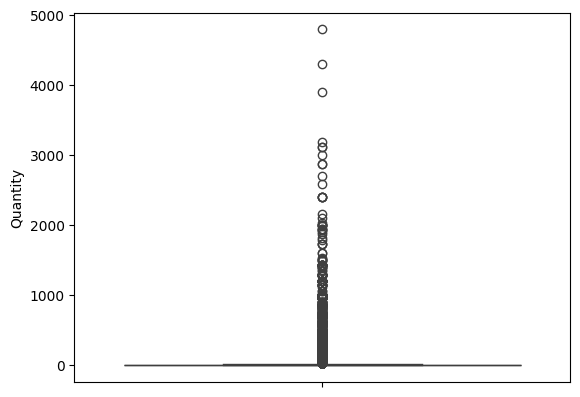

In [48]:
sns.boxplot(df["Quantity"])

<Axes: ylabel='UnitPrice'>

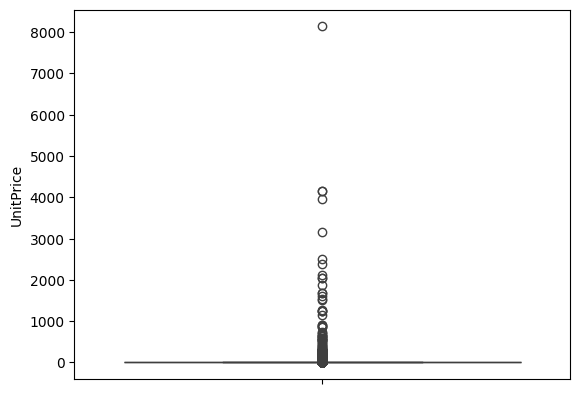

In [49]:
sns.boxplot(df["UnitPrice"])

---
인사이트
1. 일부 너무 큰 Quantity는 이상치로 제외

## 22. Data Processing 2

### 22.1. Missing Values

In [50]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
weekday        0
month          0
hour           0
dtype: int64

### 22.2. Feature Engineering
- RFM을 구하기 위한 Feature 생성
- Recency Feature
- Frequency Feature
- Monetary Feature

In [52]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,weekday,month,hour
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,12,8
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,12,8
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,12,8


In [53]:
# Recency Feature - 가장 최근 행동
df_customer_last_date = df.groupby("CustomerID").agg(max)["InvoiceDate"].reset_index()
df_customer_last_date.head()

,CustomerID,InvoiceDate
0,12347.0,2011-12-07 15:52:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-11-03 14:37:00


In [54]:
# 가장 최근 날짜로부터 recency 확인
df_customer_last_date["recency"] = (df_customer_last_date["InvoiceDate"] - df["InvoiceDate"].max()).dt.days

In [55]:
df_recency = df_customer_last_date.drop(columns = ["InvoiceDate"])
df_recency.head()

,CustomerID,recency
0,12347.0,-2
1,12348.0,-75
2,12349.0,-19
3,12350.0,-310
4,12352.0,-36


In [56]:
# Frequency Feature - 빈도 높은 행동
df_frequency = df[["CustomerID", "InvoiceNo"]].drop_duplicates().groupby("CustomerID").count().reset_index()
df_frequency.rename(columns = {"InvoiceNo" : "frequency"}, inplace = True)
df_frequency.head()

,CustomerID,frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,8


In [57]:
# Monetary Feature - 구매 관련 행동
df["monetary_row"] = df["Quantity"] * df["UnitPrice"]
df_monetary = df.groupby("CustomerID").agg(sum)["monetary_row"].reset_index()
df_monetary.rename(columns = {'monetary_row' : 'monetary'}, inplace = True)
df_monetary.head()

<ipython-input-57-d51ee0951ccc>:3: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_monetary = df.groupby("CustomerID").agg(sum)["monetary_row"].reset_index()


,CustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04


In [58]:
# 테이블 합치기
df_rfm = df_recency.merge(df_frequency, on="CustomerID").merge(df_monetary, on="CustomerID")

In [59]:
df_rfm

,CustomerID,recency,frequency,monetary
0,12347.0,-2,7,4310.00
1,12348.0,-75,4,1797.24
2,12349.0,-19,1,1757.55
3,12350.0,-310,1,334.40
4,12352.0,-36,8,2506.04
...,...,...,...,...
4332,18280.0,-278,1,180.60
4333,18281.0,-181,1,80.82
4334,18282.0,-8,2,178.05
4335,18283.0,-4,16,2045.53


In [60]:
df_rfm["frequency"]

0        7
1        4
2        1
3        1
4        8
        ..
4332     1
4333     1
4334     2
4335    16
4336     3
Name: frequency, Length: 4337, dtype: int64

In [61]:
# RFM score
df_rfm["recency_ntile"] = pd.qcut(df_rfm["recency"], 5, labels = [1, 2, 3, 4, 5])
df_rfm["frequency_ntile"] = pd.qcut(df_rfm["frequency"].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
df_rfm["monetary_ntile"] = pd.qcut(df_rfm["monetary"], 5, labels = [1, 2, 3, 4, 5])

In [62]:
df_rfm.head()

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
0,12347.0,-2,7,4310.00,5,5,5
1,12348.0,-75,4,1797.24,2,4,4
2,12349.0,-19,1,1757.55,4,1,4
3,12350.0,-310,1,334.40,1,1,2
4,12352.0,-36,8,2506.04,3,5,5


### 22.3. Feature Transformation
- Feature Scaling
- Standardization과 MinMaxScaling은 다름
- MinMaxScaling은 [0, 1]로 값을 scaling하는 것 (e.g. sklearn의 MinMaxScaler())
- Standardization은 정규분포의 표준화를 활용하여 Scaling하는 것 (e.g. sklearn의 StandardScaler())

In [65]:
# kmeans clustering을 위한 feature
df_rfm_clustering = df_rfm.copy()

In [66]:
df_rfm_clustering = df_rfm_clustering[["CustomerID", "recency", "frequency", "monetary"]]
df_rfm_clustering.head()

,CustomerID,recency,frequency,monetary
0,12347.0,-2,7,4310.00
1,12348.0,-75,4,1797.24
2,12349.0,-19,1,1757.55
3,12350.0,-310,1,334.40
4,12352.0,-36,8,2506.04


In [67]:
scaler = MinMaxScaler()
list_scaling = ["recency", "frequency", "monetary"]
df_rfm_clustering.loc[:, list_scaling] = scaler.fit_transform(df_rfm_clustering[list_scaling])
df_rfm_clustering.head()

,CustomerID,recency,frequency,monetary
0,12347.0,0.994652,0.028708,0.015371
1,12348.0,0.799465,0.014354,0.006404
2,12349.0,0.949198,0.000000,0.006262
3,12350.0,0.171123,0.000000,0.001183
4,12352.0,0.903743,0.033493,0.008933


---
### 22.4. 요약
최종 생성 Feature의 특성
- df_rfm: rfm heuristic 분석을 위한 Feature
- df_rfm_clustering: rfm clustering 분석을 위한 Feature

## 4. Model Analysis

### 4.1. Heuristic RFM Analysis

In [68]:
df_heuristic_rfm = df_rfm.groupby(["recency_ntile", "monetary_ntile", "frequency_ntile"]).agg(np.mean).reset_index()
df_heuristic_rfm

,recency_ntile,monetary_ntile,frequency_ntile,CustomerID,recency,frequency,monetary
0,1,1,1,14129.610811,-285.291892,1.000000,144.089135
1,1,1,2,17022.155844,-273.428571,1.032468,147.116688
2,1,1,3,16353.809524,-237.238095,2.000000,161.810000
3,1,1,4,16922.666667,-211.666667,3.000000,208.880000
4,1,1,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
120,5,5,1,15195.000000,-3.000000,1.000000,3861.000000
121,5,5,2,13868.000000,-7.000000,2.000000,3192.540000
122,5,5,3,13943.800000,-8.600000,2.800000,3508.084000
123,5,5,4,14383.317073,-7.024390,4.390244,3293.502927


In [69]:
# VIP 고객에게 마케팅 진행
# recency_ntitle == 5, frequency_ntile == 5, monetary_ntile == 5
df_rfm[(df_rfm.recency_ntile == 5) & (df_rfm.monetary_ntile == 5) & (df_rfm.frequency_ntile == 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
0,12347.0,-2,7,4310.00,5,5,5
14,12362.0,-3,10,5226.23,5,5,5
55,12417.0,-3,9,3649.10,5,5,5
70,12433.0,-1,7,13375.87,5,5,5
74,12437.0,-2,18,4951.41,5,5,5
...,...,...,...,...,...,...,...
4296,18229.0,-12,20,7276.90,5,5,5
4297,18230.0,-9,7,2810.20,5,5,5
4306,18241.0,-10,17,2073.09,5,5,5
4308,18245.0,-7,7,2567.06,5,5,5


In [70]:
# 이전에 구매를 많이 했지만, 최근에 구매가 적은 고객
# recency_ntitle == 1, frequency_ntile == 5, monetary_ntile == 5

df_rfm[(df_rfm.recency_ntile == 1) & (df_rfm.monetary_ntile == 5) & (df_rfm.frequency_ntile == 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
565,13093.0,-276,8,7832.47,1,5,5
2117,15235.0,-218,12,2247.51,1,5,5
3569,17230.0,-264,8,3638.41,1,5,5
3763,17504.0,-206,9,2997.03,1,5,5
4015,17850.0,-372,34,5391.21,1,5,5


In [71]:
# 구매와 매출이 높지만, 1-2달 동안 구매가 없음, 쿠폰 지급 가능
# recency_ntitle == 3, monetary_ntile == 5, frequency_ntile == 5

df_rfm[(df_rfm.recency_ntile == 3) & (df_rfm.monetary_ntile == 5) & (df_rfm.frequency_ntile == 5)]

,CustomerID,recency,frequency,monetary,recency_ntile,frequency_ntile,monetary_ntile
4,12352.0,-36,8,2506.04,3,5,5
68,12431.0,-36,15,6419.95,3,5,5
91,12457.0,-66,7,2363.23,3,5,5
199,12594.0,-38,10,3338.22,3,5,5
234,12637.0,-67,8,6002.90,3,5,5
...,...,...,...,...,...,...,...
4086,17940.0,-49,10,4020.04,3,5,5
4104,17965.0,-38,14,2599.19,3,5,5
4134,18008.0,-70,9,2116.19,3,5,5
4293,18226.0,-44,11,5228.05,3,5,5


### 4.2. K-Means RFM Analysis

In [72]:
df_rfm_clustering

,CustomerID,recency,frequency,monetary
0,12347.0,0.994652,0.028708,0.015371
1,12348.0,0.799465,0.014354,0.006404
2,12349.0,0.949198,0.000000,0.006262
3,12350.0,0.171123,0.000000,0.001183
4,12352.0,0.903743,0.033493,0.008933
...,...,...,...,...
4332,18280.0,0.256684,0.000000,0.000634
4333,18281.0,0.516043,0.000000,0.000278
4334,18282.0,0.978610,0.004785,0.000625
4335,18283.0,0.989305,0.071770,0.007290


In [73]:
sum_of_squared_distances = []
K = range(2, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df_rfm_clustering.drop("CustomerID", axis = 1))
    sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

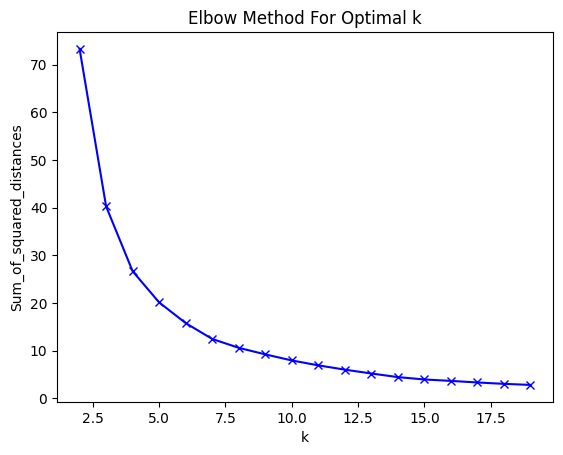

In [74]:
# 적당한 클러스터 수 설정
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow Method는 클러스터 개수(K)를 변화시켜가면서 K-means 알고리즘을 수행한 결과를 나타낸 그래프.
그래프에서 팔꿈치 모양을 띄는 지점이 최적의 클러스터 개수.

이 방법은 클러스터 개수를 증가시켜가며 알고리즘을 실행하고, 클러스터마다 제곱오차합(SSE, Sum of Squared Errors)을 구한 뒤, 이를 차트로 표시함.

팔꿈치는 k = 5

In [75]:
# 클러스터 수 설정
km_final = KMeans(n_clusters = 5)
km_final = km_final.fit(df_rfm_clustering.drop("CustomerID", axis = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
df_rfm_clustering["cluster_number"] = km_final.predict(df_rfm_clustering.drop("CustomerID", axis = 1))

In [77]:
df_rfm_clustering

,CustomerID,recency,frequency,monetary,cluster_number
0,12347.0,0.994652,0.028708,0.015371,0
1,12348.0,0.799465,0.014354,0.006404,4
2,12349.0,0.949198,0.000000,0.006262,0
3,12350.0,0.171123,0.000000,0.001183,3
4,12352.0,0.903743,0.033493,0.008933,0
...,...,...,...,...,...
4332,18280.0,0.256684,0.000000,0.000634,1
4333,18281.0,0.516043,0.000000,0.000278,2
4334,18282.0,0.978610,0.004785,0.000625,0
4335,18283.0,0.989305,0.071770,0.007290,0


In [78]:
# cluste별 RFM score 패턴 확인
cluster_result = df_rfm_clustering.drop(columns = ["CustomerID"]).groupby("cluster_number").agg(np.mean)

In [79]:
cluster_result

,recency,frequency,monetary
cluster_number,,,
0,0.951677,0.026974,0.011817
1,0.338438,0.002159,0.002100
2,0.575833,0.005420,0.002689
3,0.101245,0.001716,0.001368
4,0.806749,0.008158,0.003755


---
결론
- 클러스터링 분석보다는 휴리스틱 분석이 더 효과적으로 활용될 수 있을 것으로 보임
- 클러스터링 최적화 필요

In [80]:
# 클러스터 데이터 추출
df_rfm_clustering.to_csv("cluster.csv")